<a href="https://colab.research.google.com/github/aakashr21/Netflix-movies-and-tv-show-clustering/blob/main/Netflix_Movie_and_TV_Show_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member**     - Aakash R


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries for data wrangling
import numpy as np
import pandas as pd

# Import Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Libraries for statisical analysis
import scipy.stats as stats

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
# mounting drive
from google.colab import drive
drive.mount("/content/drive")

# Loading dataset
df = pd.read_csv("/content/drive/MyDrive/Capstone project/Capstone project 6/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
df

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devast

In [ ]:
# Dataset first five rows
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
# Dataset last five rows
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

print(df.shape)
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")

(7787, 12)
There are 7787 rows and 12 columns


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# Percentage of Missing values present in each columns
df.isna().mean()*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

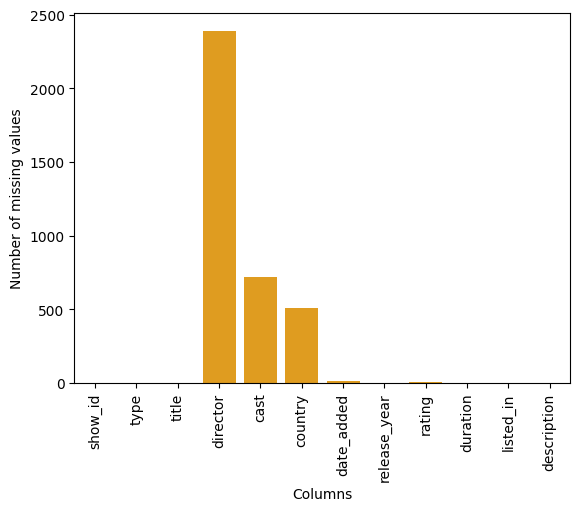

In [ ]:
# Visualizing the missing values
sns.barplot(x=df.columns,y=df.isna().sum(),color="orange")
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of missing values")
plt.show()

### What did you know about your dataset?

There are 7787 rows and 12 columns in dataset.

In datset there are

*   11 Object data type columns.
*   1 integer data type column (release_year).
*   There are 3631 data are missing in the dataset, director column has 30% data missing.
*   There are no duplicate values present.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
columns = list(df.columns)
print("The columns present are :\n")
print(columns)

The columns present are :

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [ ]:
# Dataset Describe
df.describe(include="all")

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description

* **show_id** : Unique ID given to each movies/TV shows
* **type** : Type of each movie (Movie/TV Show)
* **title** : Title of each movies/TV shows
* **director** : Name of the director of each movies/TV shows
* **cast** : Name of the cast crew who are all played in movies/TV shows
* **country** : Countries in which movie is released
* **date_added** : Date on which show/movie added in netflix
* **release_year** : Year on which the movie/show is released
* **rating** : The rating given to the show/movie
* **duration** : The duration of each movie/show
* **listed_in** : Categories the movie/show is listed in  
* **description** : Description about the movie/show



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [ ]:
# list of unique values present in each columns

for column in columns:
  print(f"Unique values present in {column}\n")
  print(df[column].unique(),"\n")

Unique values present in show_id

['s1' 's2' 's3' ... 's7785' 's7786' 's7787'] 

Unique values present in type

['TV Show' 'Movie'] 

Unique values present in title

['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"] 

Unique values present in director

[nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn'] 

Unique values present in cast

['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo'] 

Uni

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# data of movie
movie_df = df.loc[df.loc[:,"type"]=="Movie"]
# data of tv show
tvshow_df = df.loc[df.loc[:,"type"]=="TV Show"]

In [ ]:
# Number of movies or TV shows present in each type
df['type'].value_counts()
No_of_movies = df['type'].value_counts()[0]
No_of_tvshow = df['type'].value_counts()[1]
print(f"Total number of Movies and TV shows present are {df['type'].count()}")
print(f"Total number of movies are {No_of_movies}")
print(f"Total number of TV shows are {No_of_tvshow}")
print(f"Percentage of tv show and movies are {round((No_of_tvshow/df['type'].count())*100,2)}% and {round((No_of_movies/df['type'].count())*100,2)}%")

Total number of Movies and TV shows present are 7787
Total number of movies are 5377
Total number of TV shows are 2410
Percentage of tv show and movies are 30.95% and 69.05%


In [ ]:
# Top 10 Directors with most number shows and movies
print("Top 10 directors with highest number movies\n")
print(movie_df['director'].value_counts()[:11],"\n")
print("Top 10 directors with highest number tv shows\n")
print(tvshow_df['director'].value_counts()[:11])

Top 10 directors with highest number movies

Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Johnnie To                 8
Robert Rodriguez           8
Name: director, dtype: int64 

Top 10 directors with highest number tv shows

Alastair Fothergill           3
Ken Burns                     2
Shin Won-ho                   2
Iginio Straffi                2
Rob Seidenglanz               2
Stan Lathan                   2
Serdar Akar                   1
Jani Lachauer, Jakob Schuh    1
Jalil Lespert                 1
Jay Chandrasekhar             1
Vijay Roche                   1
Name: director, dtype: int64


In [ ]:
# top 5 Countries with highest number movies/tv shows
print("Top 5 countries with highest number of movies\n")
print(movie_df['country'].value_counts()[:6],"\n")
print("Top 5 countries with highest number of tv shows\n")
print(tvshow_df['country'].value_counts()[:6])

Top 5 countries with highest number of movies

United States     1850
India              852
United Kingdom     193
Canada             118
Spain               89
Egypt               89
Name: country, dtype: int64 

Top 5 countries with highest number of tv shows

United States     705
United Kingdom    204
Japan             157
South Korea       147
India              71
Taiwan             68
Name: country, dtype: int64


In [ ]:
# number of tv shows and movies where added in netflix for each year
df['added_year'] = pd.DatetimeIndex(df['date_added']).year
most_movie_add_year = df[df['type']=='Movie']["added_year"].value_counts()
most_tvshow_add_year = df[df['type']=='TV Show']["added_year"].value_counts()

print("Number movies added in netflix for each year are:\n")
print(most_movie_add_year,"\n")
print("Number tv shows added in netflix for each year are:\n")
print(most_tvshow_add_year,"\n")
print("Year on which most number of contents added is: \n")
print(df['added_year'].value_counts().head(1))

Number movies added in netflix for each year are:

2019.0    1497
2020.0    1312
2018.0    1255
2017.0     864
2016.0     258
2021.0      88
2015.0      58
2014.0      19
2011.0      13
2013.0       6
2012.0       3
2009.0       2
2010.0       1
2008.0       1
Name: added_year, dtype: int64 

Number tv shows added in netflix for each year are:

2020.0    697
2019.0    656
2018.0    430
2017.0    361
2016.0    185
2015.0     30
2021.0     29
2014.0      6
2013.0      5
2008.0      1
Name: added_year, dtype: int64 

Year on which most number of contents added is: 

2019.0    2153
Name: added_year, dtype: int64


In [ ]:
# month on which most content are added
df['added_month'] = pd.DatetimeIndex(df['date_added']).month
month_content_add = df['added_month'].value_counts()
print("Number of contents added per month\n")
print(month_content_add)

Number of contents added per month

12.0    833
10.0    785
1.0     757
11.0    738
3.0     669
9.0     619
8.0     618
4.0     601
7.0     600
5.0     543
6.0     542
2.0     472
Name: added_month, dtype: int64


In [ ]:
# top 10 year on which most number of movies and tv shows released
most_movie_year = df[df['type']=='Movie']["release_year"].value_counts()[:11]
most_tvshow_year = df[df['type']=='TV Show']["release_year"].value_counts()[:11]
print("Top 10 year most number of movies released:\n")
print(most_movie_year,"\n")
print("Top 10 year most number of TV Shows released:\n")
print(most_tvshow_year,"\n")
print("Year on which most number of contents released is: \n")
print(df['release_year'].value_counts().head(1))

Top 10 year most number of movies released:

2017    744
2018    734
2016    642
2019    582
2020    411
2015    382
2014    244
2013    202
2012    158
2010    136
2011    127
Name: release_year, dtype: int64 

Top 10 year most number of TV Shows released:

2020    457
2019    414
2018    387
2017    268
2016    240
2015    159
2014     90
2013     65
2012     61
2011     39
2010     37
Name: release_year, dtype: int64 

Year on which most number of contents released is: 

2018    1121
Name: release_year, dtype: int64


In [ ]:
#count of each ratings ratings and most given rating
most_ratings_movie = df[df['type']=='Movie']['rating'].value_counts()
most_ratings_tvshow = df[df['type']=='TV Show']['rating'].value_counts()
print("Count of each rating for movie:\n")
print(most_ratings_movie,"\n")
print("Count of each rating for tv show:\n")
print(most_ratings_tvshow,"\n")
print("Most given rating for movie is",most_ratings_movie.head(1),"\n")
print("Most given rating for tvshow is",most_ratings_tvshow.head(1),"\n")

Count of each rating for movie:

TV-MA       1845
TV-14       1272
R            663
TV-PG        505
PG-13        386
PG           247
TV-Y         117
TV-G         111
TV-Y7         95
NR            79
G             39
TV-Y7-FV       5
UR             5
NC-17          3
Name: rating, dtype: int64 

Count of each rating for tv show:

TV-MA       1018
TV-14        659
TV-PG        301
TV-Y7        176
TV-Y         163
TV-G          83
NR             5
R              2
TV-Y7-FV       1
Name: rating, dtype: int64 

Most given rating for movie is TV-MA    1845
Name: rating, dtype: int64 

Most given rating for tvshow is TV-MA    1018
Name: rating, dtype: int64 



In [ ]:
#most common duration for tv show and movies
common_movie_duration = df[df['type']=='Movie']['duration'].value_counts().head(1)
common_tvshow_duration = df[df['type']=='TV Show']['duration'].value_counts().head(1)
print("The common duration for movies is \n",common_movie_duration,"\n")
print("The common duration for tv shows is \n",common_tvshow_duration,"\n")

The common duration for movies is 
 90 min    136
Name: duration, dtype: int64 

The common duration for tv shows is 
 1 Season    1608
Name: duration, dtype: int64 



### What all manipulations have you done and insights you found?

There are totally 7787 contents in netflix in this 30.95% is TV Shows and 69.05% is movies.

### **Directors**
*   The most number of movies are directed by Raúl Campos, Jan Suter.
*   The most number of TV shows are directed by Alastair Fothergill.

### **Countries**
*   United States has released most number of movies and TV shows.
      * 1850 movies and 705 TV shows are released in United States.
*   India is second country which has released most number of movies, totally 852 movies.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

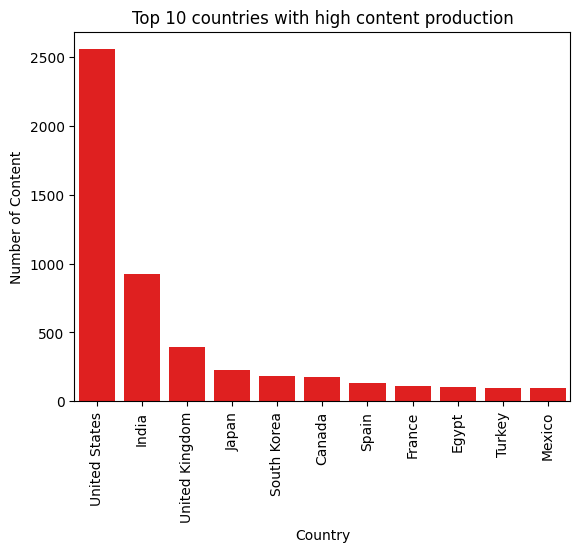

In [ ]:
# Chart - 1 visualization code
# Top 10 countrie produce more content
top10country = df['country'].value_counts()[:11]
sns.barplot(top10country,color='red')
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Number of Content")
plt.title("Top 10 countries with high content production")
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

We used barchart to show high content production of Top 10 contries

##### 2. What is/are the insight(s) found from the chart?

The above chart shows that United states has produced more (2555)contents campared other contries. And all other contreis producded contents less than 1000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix should also tie up with countries to produce more content for their growth.If they don't concentrate on other countries they will loose contents.

#### Chart - 2

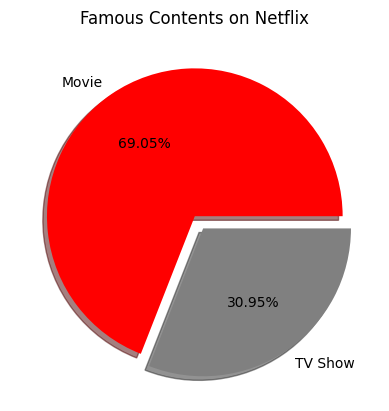

In [ ]:
# Chart - 2 visualization code
# most famous content on netflix
famouscontent = df["type"].value_counts()
plt.pie(x=famouscontent.values,labels=famouscontent.index,autopct='%.2f%%',explode=[0,0.1],shadow=True,colors=['red','grey'])
plt.title("Famous Contents on Netflix")
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are generally used to show the proportions of a whole, and are especially useful for displaying data that has already been calculated as a percentage of the whole. They are an effective way to display proportions or percentages of data in a simple and visually appealing way.

So,we used pie chart to show proportion of contents in Netflix.

##### 2. What is/are the insight(s) found from the chart?

This shows that 69%(5377) of content is movies and 31%(2410) of content is TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix has only 30% of TV shows they need to increase their TV show contents to increase their views and customers.

#### Chart - 3

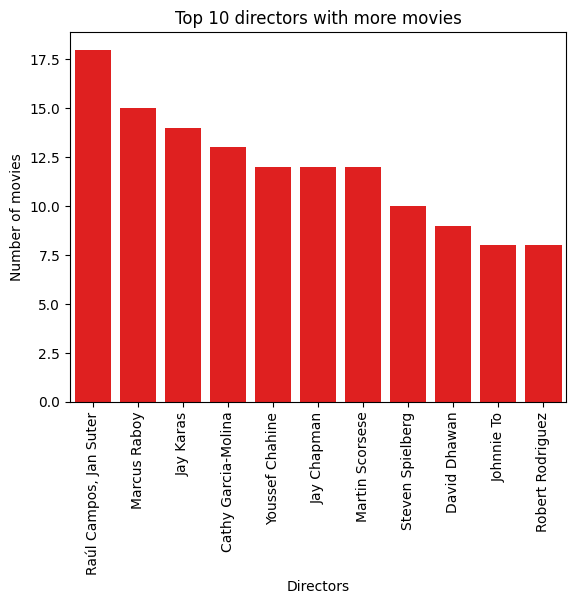

In [ ]:
# Chart - 3 visualization code
# Top10 directors with more movies produced
movie_dir = movie_df['director'].value_counts()[:10].reset_index(name="count")
sns.barplot(data = movie_dir , x = "index"  , y = "count" , color = 'red')
plt.xticks(rotation=90)
plt.title("Top 10 directors with more movies")
plt.xlabel("Directors")
plt.ylabel("Number of movies")
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

We used barchart to show Top 10 directors with more movies produced.

##### 2. What is/are the insight(s) found from the chart?

These Top 10 directors produced more number of movies more than other directors.Raúl Campos, Jan Suter produced 18 movies and  Marcus Raboy produced 15 movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This gives insight about popular movie directors.We collaborate with these popular directors to produce and add more great content in Netflix to attract more users.

#### Chart - 4

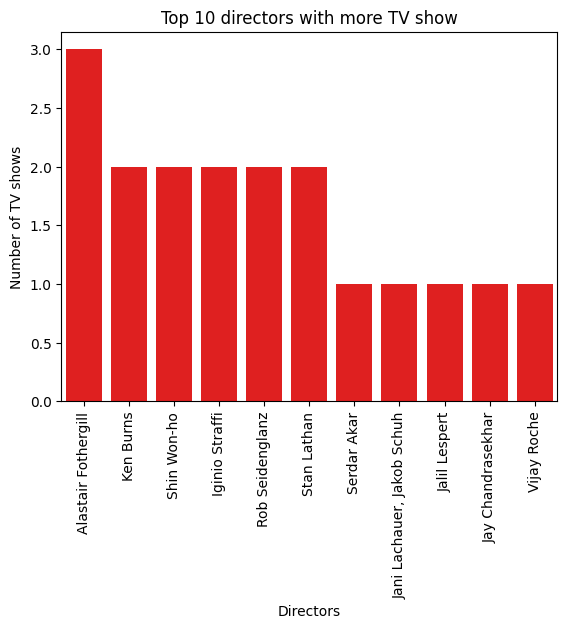

In [ ]:
# Chart - 4 visualization code
# Top10 directors with more movies produced
tvshow_dir = tvshow_df['director'].value_counts()[:10].reset_index(name="count")
sns.barplot(data = tvshow_dir , x = "index"  , y = "count" , color = 'red')
plt.xticks(rotation=90)
plt.title("Top 10 directors with more TV show")
plt.xlabel("Directors")
plt.ylabel("Number of TV shows")
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

We used barchart to show Top 10 directors with more TV shows produced.

##### 2. What is/are the insight(s) found from the chart?

These Top 10 directors produced more number of TV shows more than other directors.Alastair Fothergill produced 3 TV shows and other directors produced 2 or less number tv shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This gives insight about popular movie directors.We collaborate with these popular directors to produce and add more great contents in Netflix to attract more users.

#### Chart - 5

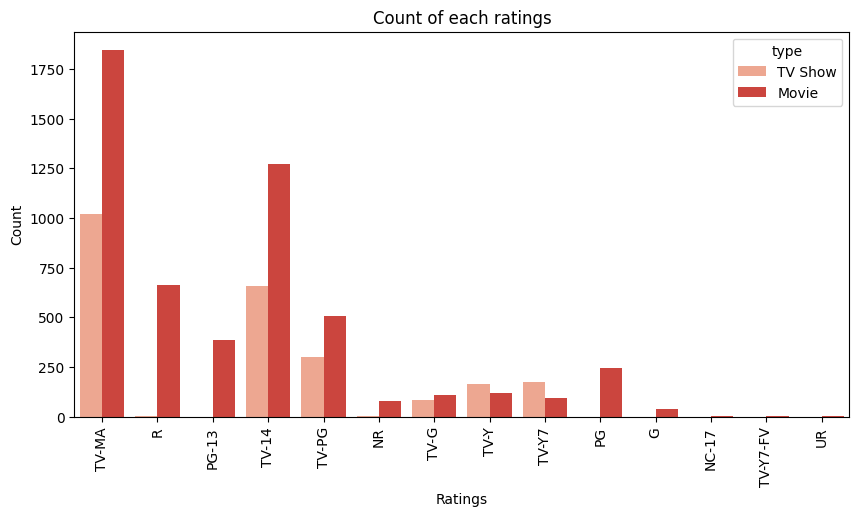

In [ ]:
# Chart - 5 visualization code
# most common ratings
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="rating",hue="type",palette="Reds")
plt.xticks(rotation=90)
plt.title("Count of each ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.It uses the concept of a bar chart for the visual depiction.

So,we used to count of tv shows and movies present in each ratings.

##### 2. What is/are the insight(s) found from the chart?

This chart shows that most number contents produced are TV-MA and TV-14 ratings which are adults and teens categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix has more contents related to adults and teens,they should also add more kids category contents to get more users.

#### Chart - 6

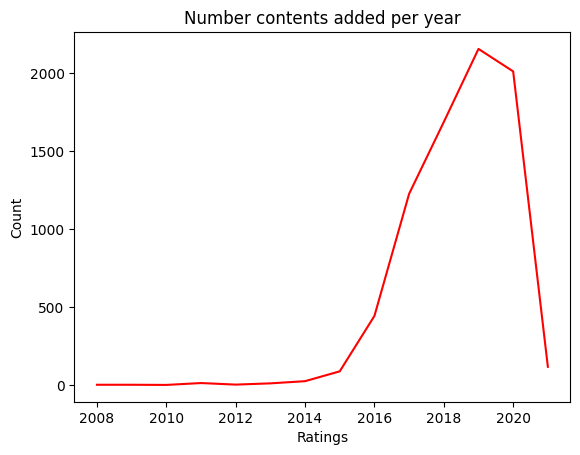

In [ ]:
# Chart - 6 visualization code
# Number contents added per year
year_trend = df.groupby("added_year")["added_year"].count()
sns.lineplot(x=year_trend.index,y=year_trend.values,color="red")
plt.title("Number contents added per year")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

Line graphs are used to track changes over short and long periods of time. Line graphs can also be used to compare changes over the same period of time for more than one group.

So,we used linechart to see the trend in adding contents in Netflix.

##### 2. What is/are the insight(s) found from the chart?

This shows that there is postive trend in adding contents in netflix over the years.And also showing there is sudden increase after 2015.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix can keep up with this trend for their growth.

#### Chart - 7

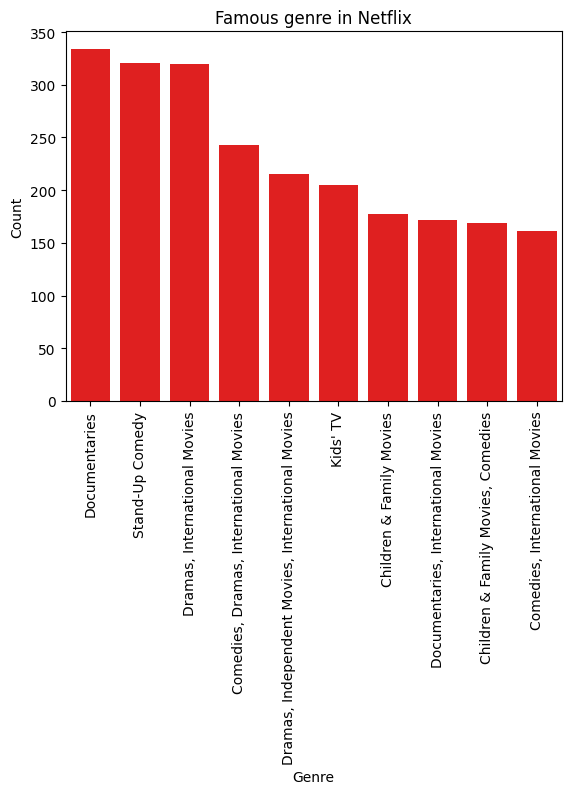

In [ ]:
# Chart - 7 visualization code
genre = df.groupby("listed_in")["listed_in"].count().sort_values(ascending=False).head(10)
sns.barplot(x=genre.index,y=genre.values,color="red")
plt.xticks(rotation=90)
plt.title("Famous genre in Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

We used barchart to show Top 10 genres with more contents produced in Netflix.

##### 2. What is/are the insight(s) found from the chart?

The above chart shows that more number of genre are documentries,dramas,stand-up comdies, children and kids.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight shows that people like dramas, comedy genre more.So, we can add more content from this genre to attract more users.

#### Chart - 8

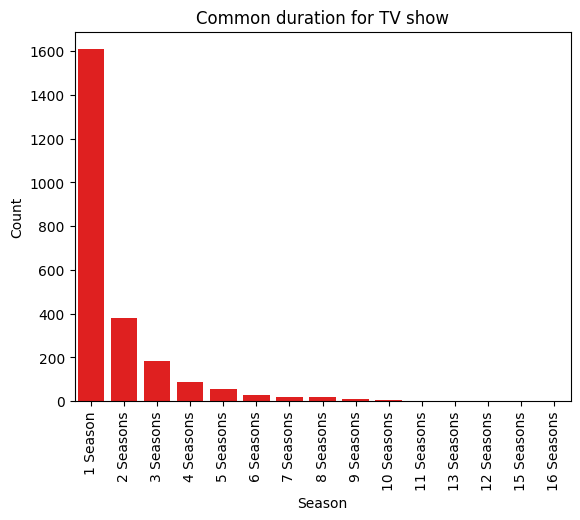

In [ ]:
# Chart - 8 visualization code
# most common duration for tv show
sns.countplot(x=tvshow_df['duration'],data=tvshow_df,order = tvshow_df['duration'].value_counts().index,color="red")
plt.xticks(rotation=90)
plt.title("Common duration for TV show")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

We used barchart to show common duration of TV shows.

##### 2. What is/are the insight(s) found from the chart?

The above chart shows that most commen duration in TV show is 1 season,60% of TV shows have only duration of 1 season.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It showing that most TV shows are having 1 season only.If this continues it may negatively affect tv show content production.

#### Chart - 9

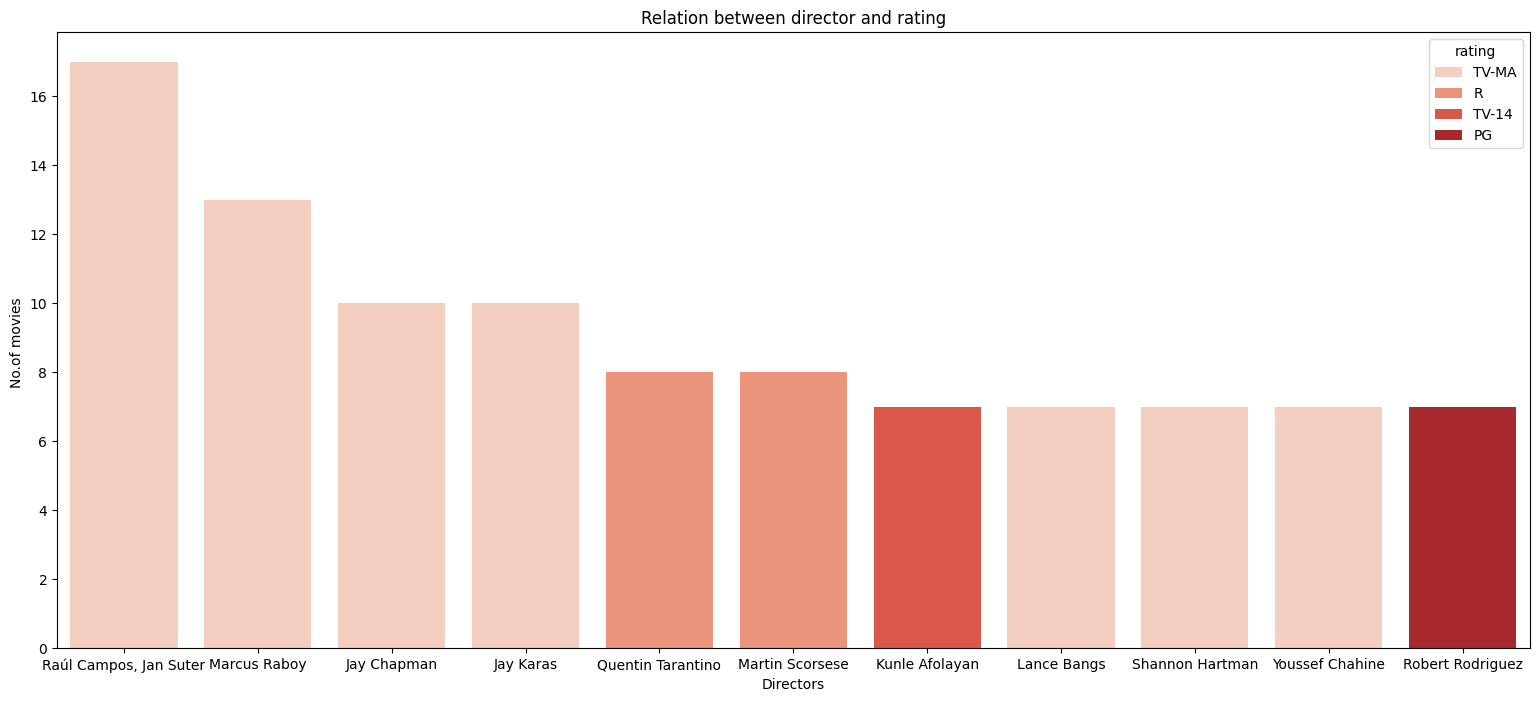

In [ ]:
# Chart - 9 visualization code
# Relation Between directors and rating
plt.figure(figsize=(19,8))
relation = df.groupby(["director","rating"])["rating"].count().sort_values(ascending=False)[:11].reset_index(name="count")
sns.barplot(x = relation["director"] , y = relation["count"],hue=relation["rating"],palette="Reds")
plt.title("Relation between director and rating")
plt.xlabel("Directors")
plt.ylabel("No.of movies ")
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

We used barchart to show directors relation with ratings.

##### 2. What is/are the insight(s) found from the chart?

This chart shows that most directors like to make adult categories related contents more than other categories.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

They need to promote directors to take more content in other categories to attract more users.

#### Chart - 10

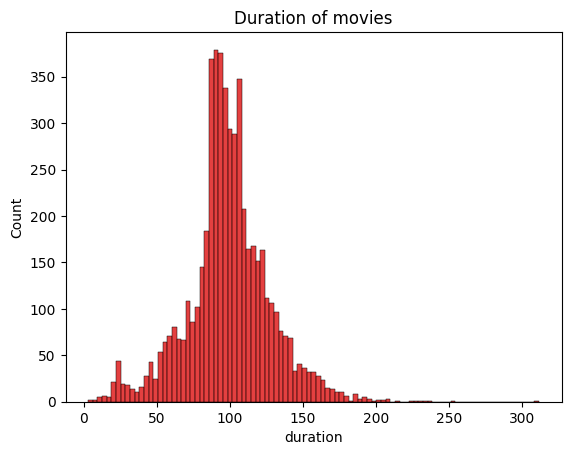

In [ ]:
# Chart - 10 visualization code
# distribution of duration in movies
duration_movies = movie_df['duration'].reset_index()
duration_movies['duration'] = duration_movies['duration'].str.replace(' min', '')
duration_movies['duration'] = duration_movies['duration'].astype(str).astype(int)
sns.histplot(data=duration_movies['duration'], color='#db0000')
plt.title('Duration of movies')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is a chart that plots the distribution of a numeric variable's values as a series of bars. Each bar typically covers a range of numeric values called a bin or class; a bar's height indicates the frequency of data points with a value within the corresponding bin.

So,we histogram to see distribution Movies durations.

##### 2. What is/are the insight(s) found from the chart?

The above chart shows that distribution of duration of movies is more around the middle(90-110 mins).And the duration is normally distributed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This shows that movies with 90-110 mins duration is more popular.So netflix can add more movie within this duration to gain more users.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Statement-1:**
The 50% of content present in Netflix is of Adults category content.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis(H0) :** The 50% of content present in Netflix is of category 'Adults' content.

**Alternate hypothesis(Ha) :** The category 'Adults' content is not equal to 50% of content




#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
ratings = {'TV-Y': 'Kids','TV-G': 'Kids','G': 'Kids',
           'TV-PG': 'Older Kids','TV-Y7-FV': 'Older Kids','TV-Y7': 'Older Kids','PG': 'Older Kids',
           'TV-14': 'Teens','PG-13': 'Teens',
           'TV-MA': 'Adults','R': 'Adults','NR': 'Adults','UR': 'Adults','NC-17': 'Adults'}
df_copy = df.copy()
df_copy['target_ages'] = df_copy['rating'].replace(ratings)
df_copy['type'] = pd.Categorical(df_copy['type'])
df_copy['target_ages'] = pd.Categorical(df_copy['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

data = data = df_copy.groupby("target_ages")["target_ages"].count().reset_index(name="count")
hypo_df = pd.DataFrame(data)

# Extract counts of Teens and total counts
teens_count = hypo_df.loc[hypo_df['target_ages'] == 'Adults', 'count'].values[0]
total_count = hypo_df['count'].sum()

# Null hypothesis proportion
null_proportion = 0.5

# Perform one-sample proportion test
z_stat, p_val = proportions_ztest(teens_count, total_count, value=null_proportion, alternative='two-sided')

# Output results
print("Z-statistic:", z_stat)
print("P-value:", p_val)
if p_val < 0.05:  # Assuming a significance level of 0.05
    print("Reject null hypothesis: The category 'Adults' content is not equal to 50% of content")
else:
    print("Fail to reject null hypothesis: The 50% of content present in Netflix is of category 'Adults' content.")

Z-statistic: -6.136950383415187
P-value: 8.412064428161871e-10
Reject null hypothesis: The category 'Adults' content is not equal to 50% of content


##### Which statistical test have you done to obtain P-Value?

Used proportional Ztest to find P value.

##### Why did you choose the specific statistical test?

The z-test is a statistical test for comparing the proportions in populations.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis(H0):** year_added has no impact on type of content that gets added to the platform.

**Alternative Hypothesis(Ha):** year_added has impact on type of content that gets added to the platform.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_data = pd.crosstab(df['type'], df['added_year'], margins=False)

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(hypo_data)

alpha = 0.05 #Significance level

print("statistic:", stat)
print("P-value:", p)
if p < alpha:
  print("Reject Null hypothesis:year_added has impact on type of content that gets added to the platform.")
else:
  print("Fail to reject Null hypothesis:year_added has no impact on type of content that gets added to the platform.")

statistic: 75.22727567916088
P-value: 8.635372719955464e-11
Reject Null hypothesis:year_added has impact on type of content that gets added to the platform.


##### Which statistical test have you done to obtain P-Value?

Used Chi Square test to find P value.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H0): The number of TV shows on Netflix has nearly tripled since 2013.

Alternative Hypothesis(Ha): The number of TV shows on Netflix has not tripled since 2013.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
tv = df[df["type"]=="TV Show"]['added_year'].value_counts().reset_index()
tv = tv.rename(columns ={'index': 'year', 'added_year': 'count'})
tv['expected_count'] = tv['count']*3
tv = tv.sort_values(by = 'year').reset_index(drop = True)

In [ ]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy import stats

# Iterate over each year and perform hypothesis test
alpha = 0.05
for year in tv['year']:
    tv_shows_year = tv.loc[tv['year'] == year,'count']
    expected_tv_shows_year = tv.loc[tv['year'] == year, 'expected_count']

    # Perform Hypothesis Test
    t_statistic, p_value = stats.ttest_1samp([tv_shows_year], expected_tv_shows_year)

    # Interpret Results
    if p_value < alpha:
        print(f"Reject the null hypothesis for {year}. The number of TV shows on Netflix has not tripled since 2013.")
    else:
        print(f"Fail to reject the null hypothesis for {year}. The number of TV shows on Netflix has nearly tripled since 2013.")

Fail to reject the null hypothesis for 2008.0. The number of TV shows on Netflix has nearly tripled since 2013.
Fail to reject the null hypothesis for 2013.0. The number of TV shows on Netflix has nearly tripled since 2013.
Fail to reject the null hypothesis for 2014.0. The number of TV shows on Netflix has nearly tripled since 2013.
Fail to reject the null hypothesis for 2015.0. The number of TV shows on Netflix has nearly tripled since 2013.
Fail to reject the null hypothesis for 2016.0. The number of TV shows on Netflix has nearly tripled since 2013.
Fail to reject the null hypothesis for 2017.0. The number of TV shows on Netflix has nearly tripled since 2013.
Fail to reject the null hypothesis for 2018.0. The number of TV shows on Netflix has nearly tripled since 2013.
Fail to reject the null hypothesis for 2019.0. The number of TV shows on Netflix has nearly tripled since 2013.
Fail to reject the null hypothesis for 2020.0. The number of TV shows on Netflix has nearly tripled sinc

##### Which statistical test have you done to obtain P-Value?

Used 1 sample t test to find P value.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Before handling null values

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
added_year        10
added_month       10
dtype: int64 



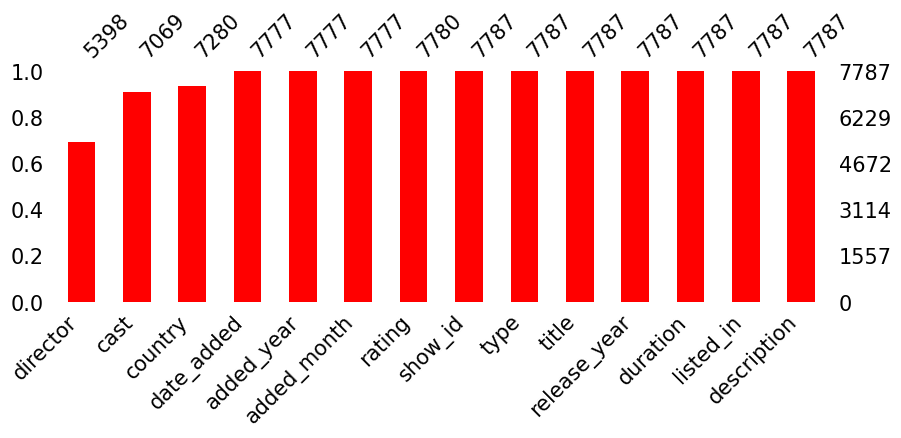

After handling null values

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
added_year      0
added_month     0
dtype: int64 



In [ ]:
# Handling Missing Values & Missing Value Imputation
print("Before handling null values\n")
print(df.isnull().sum(),"\n")

# Visualizing the missing values
import missingno as msno
msno.bar(df, color='red',sort='ascending', figsize=(10,3), fontsize=15)
plt.show()

# dropping null values
df.dropna(inplace=True)
print("After handling null values\n")
print(df.isnull().sum(),"\n")

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

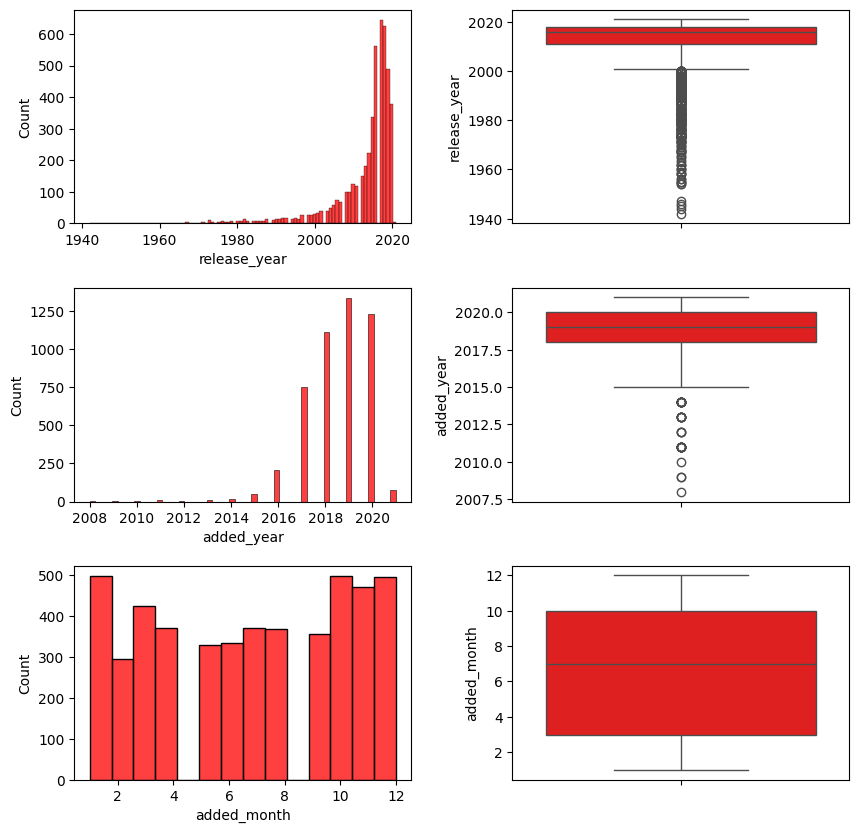

In [ ]:
# Handling Outliers & Outlier treatments
# plotting graph
fig,ax = plt.subplots(3,2, figsize=(10,10))
lst = ["release_year","added_year","added_month"]

for i,j in enumerate(lst):
  plt.subplot(3,2,i+i+1)
  plt.subplots_adjust(wspace=0.3,hspace=0.3)
  sns.histplot(data=df, x=j, color='red')

  plt.subplot(3,2,i+i+2)
  plt.subplots_adjust(wspace=0.3,hspace=0.3)
  sns.boxplot(data=df, y=j, color='red')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

* Except for the release year,added year,added month, almost all of the data are presented in text format.
* The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers.

### 3. Categorical Encoding

In [ ]:
# installing category_encoders library
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.8 MB/s eta 0:00:00


In [ ]:
# Encode your categorical columns
import category_encoders as ce
one_hot = ce.OneHotEncoder()
encode_type = one_hot.fit_transform(df['type'])
encode_type

type_1  type_2
1          1       0
2          1       0
3          1       0
4          1       0
5          0       1
...      ...     ...
7778       1       0
7780       1       0
7781       1       0
7782       1       0
7783       1       0

[4808 rows x 2 columns]

In [ ]:
ordinal = ce.OrdinalEncoder()
encode_rating = ordinal.fit_transform(df['rating'])
encode_rating

rating
1          1
2          2
3          3
4          3
5          1
...      ...
7778       2
7780       1
7781       8
7782       1
7783       4

[4808 rows x 1 columns]

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#### 1. Expand Contraction

In [ ]:
# install contraction library
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.4 MB/s eta 0:00:00


In [ ]:
# Expand Contraction
import contractions
df2 = df.copy()
df2['text_data'] = df2['description']

def contract(column):
  expand = []
  for word in column.split():
    expand.append(contractions.fix(word))
  expanded = " ".join(expand)
  return expanded

df2['text_data'] = df2['text_data'].apply(contract)
df2['text_data'] = df2['text_data']+" "+df2['director']+" "+ df2['cast']+" "+ df2['country']+" "+ df2['rating']+" "+df2['listed_in']

#### 2. Lower Casing

In [ ]:
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Lower Casing
def lower(column):
  lowered = [word.lower() for word in column.split()]
  return " ".join(lowered)

df2["text_data"] = df2["text_data"].apply(lower)

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string

def remove_punc(column):
  translator = str.maketrans("","",string.punctuation)
  return column.translate(translator)

df2["text_data"] = df2["text_data"].apply(remove_punc)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
# there are no urls and words that have digits present in the dataset.

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words("english")
def remove_stopwords(column):
  removed = [word for word in column.split() if word not in stop_words]
  return " ".join(removed)

df2["text_data"] = df2["text_data"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()
df2['text_data'] = df2['text_data'].apply(lambda x: tokenizer.tokenize(x))

#### 8. Text Normalization

In [ ]:
# # Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemma(text):
  text = [lemmatizer.lemmatize(word) for word in text]
  return " ".join(text)

df2["text_data"] = df2["text_data"].apply(lemma)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize,sent_tokenize

def identity_tokenizer(text):
  return word_tokenize(text)
# Vectorizing Text

tfidf = TfidfVectorizer(tokenizer=identity_tokenizer,stop_words = "english", lowercase = False, max_features = 10000)
tfidf.fit(df2['text_data'])
dictionary = tfidf.vocabulary_.items()

In [ ]:
vector = tfidf.transform(df2['text_data']).toarray()
print(vector)
print(f'shape of the vector {vector.shape}')
print(f'data type : {type(vector)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector (4808, 10000)
data type : <class 'numpy.ndarray'>


##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# We only one integer column and other columns are object column so we don't require manipulation

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Instead of feature selection we used dimensionality reduction

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# Dimensionality Reduction (If needed)
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
pca.fit(vector)

PCA(random_state=42)

In [ ]:
print(pca.explained_variance_ratio_)
print(vector.shape)

[6.24888382e-03 4.14417717e-03 3.60279301e-03 ... 1.42100362e-33
 1.74169102e-34 7.64678233e-37]
(4808, 10000)


Text(0, 0.5, 'cumulative explained variance')

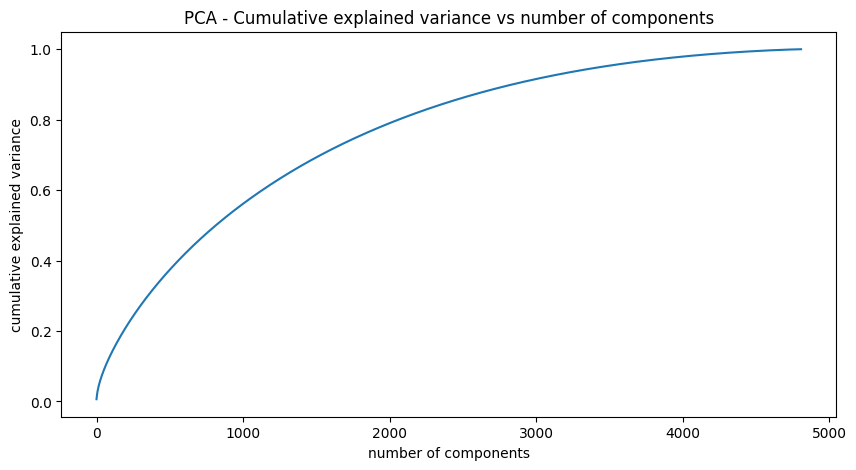

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=42)
pca.fit(vector)

PCA(n_components=4000, random_state=42)

In [ ]:
# transformed features
X = pca.transform(vector)

# shape of transformed vectors
X.shape

(4808, 4000)

In [ ]:
X

array([[ 0.02483606,  0.02773843, -0.02728826, ..., -0.00487595,
         0.00036159, -0.00810376],
       [-0.00344374, -0.05163792, -0.04860189, ...,  0.00437801,
         0.00069951,  0.01126443],
       [-0.09777628, -0.0958006 , -0.03858354, ..., -0.00576781,
         0.00022685,  0.00036211],
       ...,
       [-0.08952963, -0.02367769, -0.00128398, ..., -0.00031348,
         0.00500928,  0.00763189],
       [ 0.00187744, -0.01132429, -0.00131468, ...,  0.00411052,
         0.00395445, -0.00328611],
       [ 0.13041788,  0.01008299,  0.11597573, ..., -0.00163487,
         0.00260985,  0.0130101 ]])

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# we can avoid splitting for clustering

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouettescore = []
elbow = []
for n in range(1,16):
  cluster = KMeans(n_clusters=n,init="k-means++",random_state=42)
  cluster.fit(X)
  if n == 1:
    elbow.append(cluster.inertia_)
  else:
    labels = cluster.labels_
    sse = silhouette_score(X,labels)
    silhouettescore.append(sse)
    elbow.append(cluster.inertia_)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

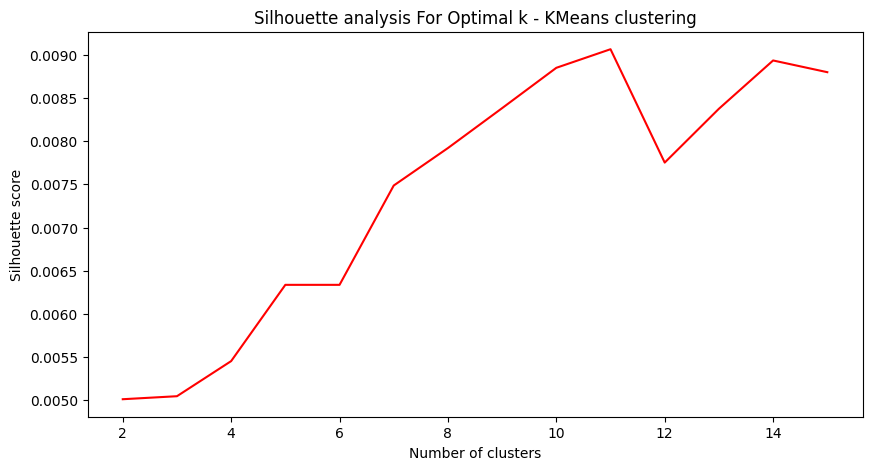

In [ ]:
# Visualizing evaluation Metric Score chart
# visualization for silhoutte score
plt.figure(figsize=(10,5))
plt.plot(range(2,16), silhouettescore,color="red")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

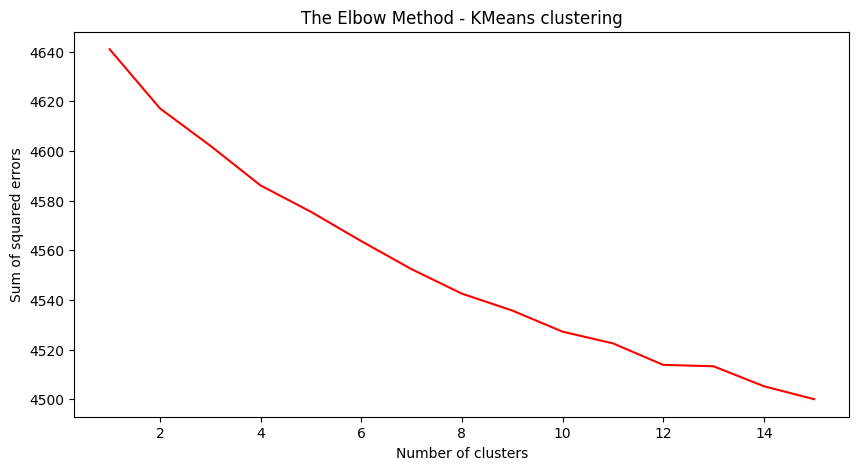

In [ ]:
# visualization for elbow method
plt.figure(figsize=(10,5))
plt.plot(range(1, 16), elbow, color = "red")
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

In [ ]:
# Clustering the data into 2 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X)

# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)
print((kmeans_distortion, kmeans_silhouette_score))

(4575.497844421341, 0.006336793739725755)


In [ ]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

In [ ]:
# sample view
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'kmeans_cluster']]

type                            title                    director  \
392   Movie  Alice Doesn't Live Here Anymore             Martin Scorsese   
520   Movie          Angela's Christmas Wish             Damien O’Connor   
1122  Movie                      Bucket List  Tejas Prabha Vijay Deoskar   
3001  Movie                     Inhuman Kiss       Sittisiri Mongkolsiri   
3997  Movie                  May You Prosper    Hassan Hegazy, Shady Ali   

                                                   cast        country rating  \
392   Ellen Burstyn, Kris Kristofferson, Billy Green...  United States     PG   
520   Lucy O'Connell, Brendan Mullins, Ruth Negga, L...  United States   TV-Y   
1122  Madhuri Dixit, Sumeet Raghvan, Renuka Shahane,...          India  TV-14   
3001  Phantira Pipityakorn, Oabnithi Wiwattanawarang...       Thailand  TV-MA   
3997  Ahmed Rizk, Bosy, Bayoumi Fouad, Mahmoud Ellit...          Egypt  TV-14   

                                              listed_in  \
392                    Classic Movies, Comedies, Dramas   
520                            Children & Family Movies   
1122                       Dramas, International Movies   
3001  Horror Movies, International Movies, Romantic ...   
3997   Comedies, International Movies, Music & Musicals   

                                            description  kmeans_cluster  
392   A widowed singer and single mother starts over...               1  
520   With her father working far away in Australia,...               1  
1122  After getting a heart transplant, a 40-year-ol...               2  
3001  A teenage girl is caught between the affection...               2  
3997  A man's inability to conquer his personal inse...               2

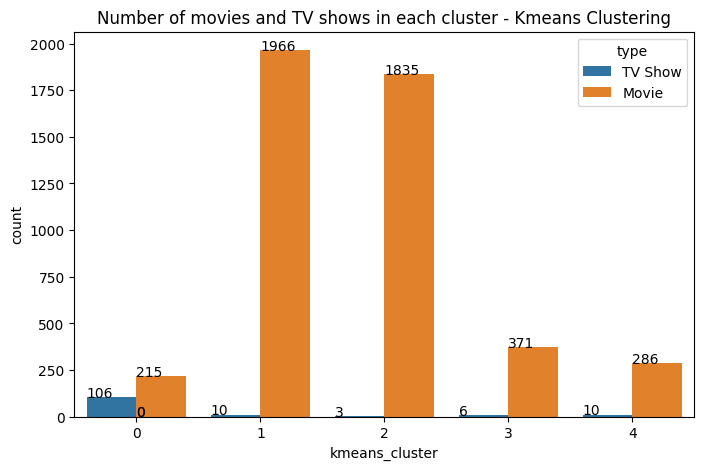

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
graph = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

In [ ]:
from wordcloud import WordCloud, STOPWORDS
def wordcloud(cluster,column):
  word_df = df[['kmeans_cluster',column]].dropna()
  word_df = word_df[word_df['kmeans_cluster']==cluster]

  text = " ".join(word for word in word_df[column])

  cloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  plt.imshow(cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

Word cloud on title for different clusters
cluster 0


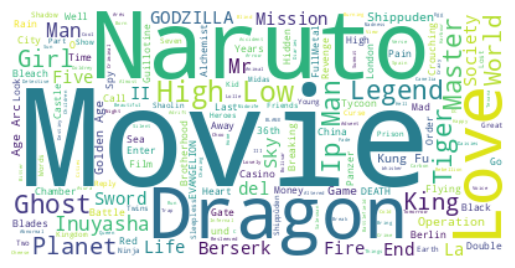


cluster 1


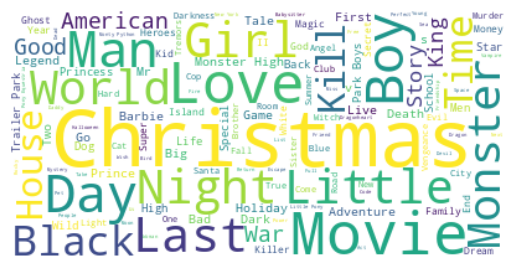


cluster 2


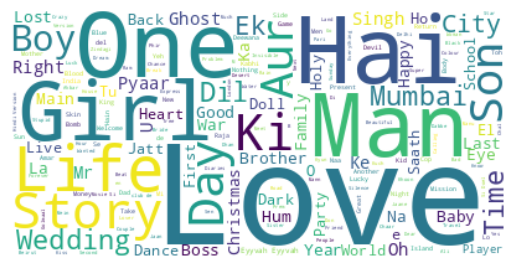


cluster 3


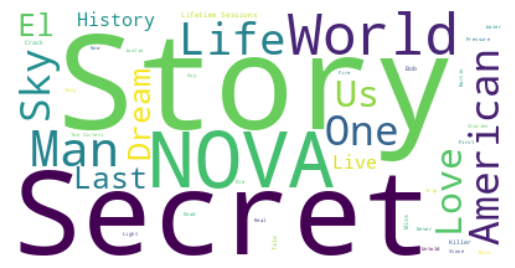


cluster 4


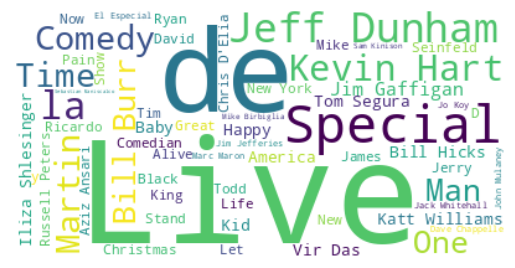


Word cloud on listed_in for different clusters
cluster 0


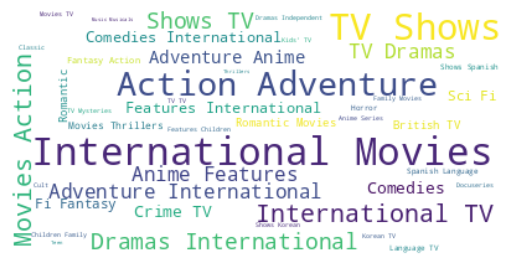


cluster 1


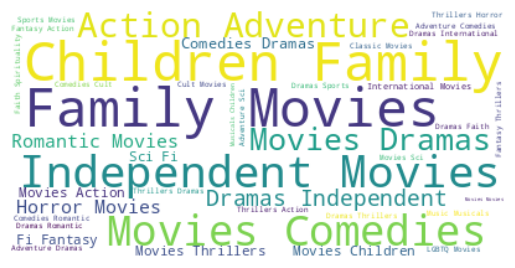


cluster 2


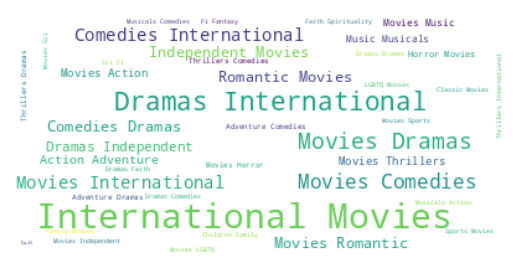


cluster 3


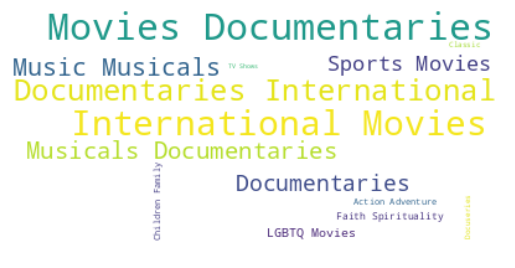


cluster 4


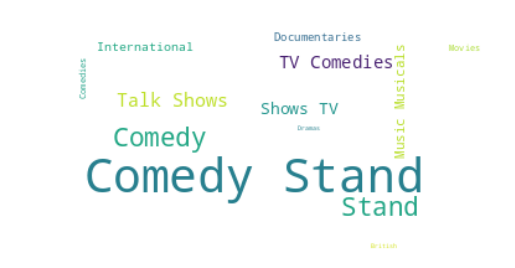


Word cloud on cast for different clusters
cluster 0


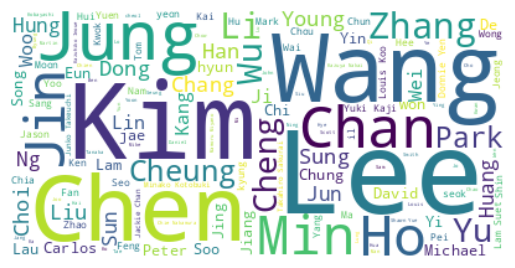


cluster 1


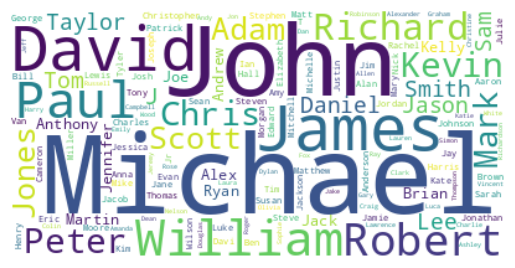


cluster 2


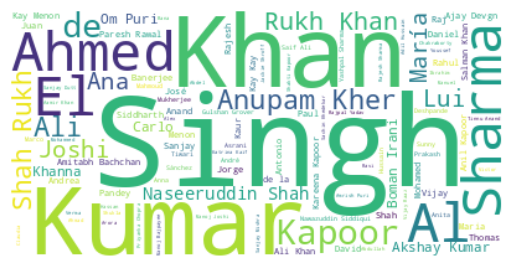


cluster 3


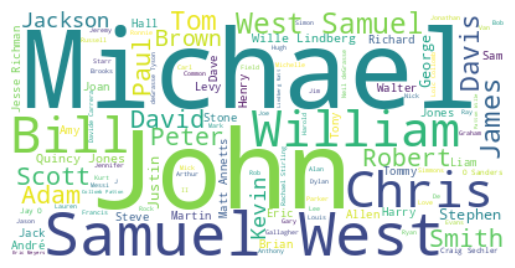


cluster 4


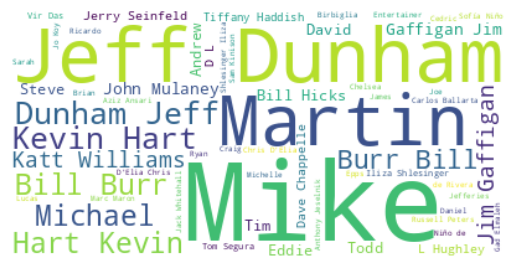


Word cloud on country for different clusters
cluster 0


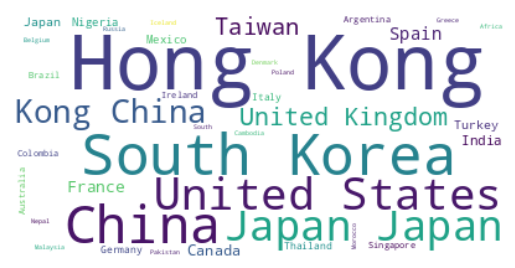


cluster 1


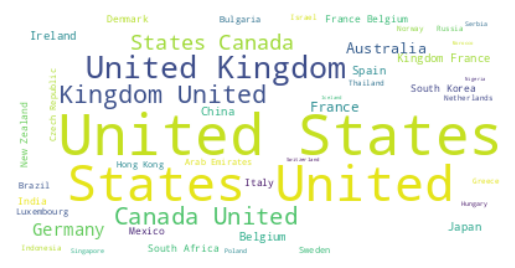


cluster 2


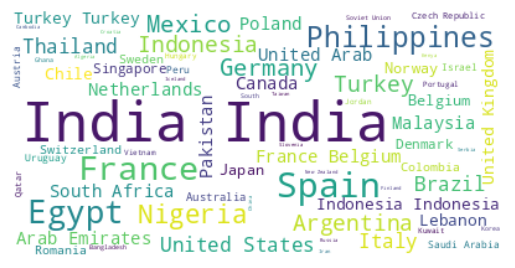


cluster 3


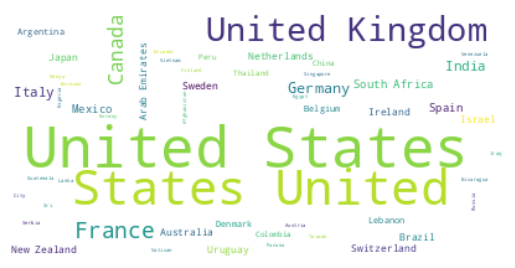


cluster 4


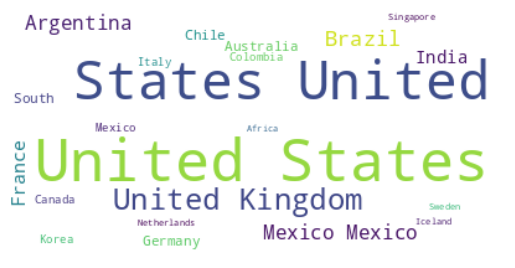


Word cloud on director for different clusters
cluster 0


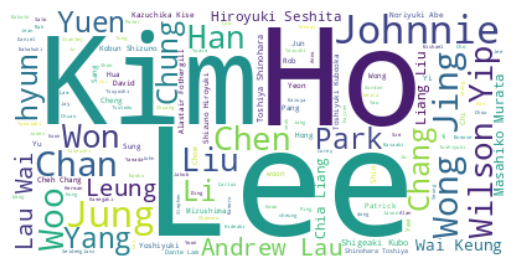


cluster 1


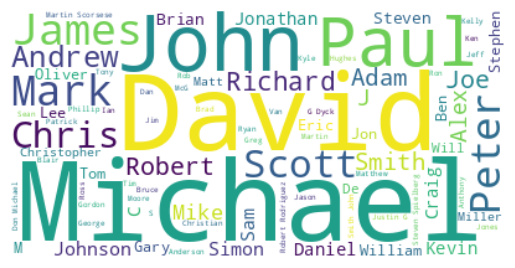


cluster 2


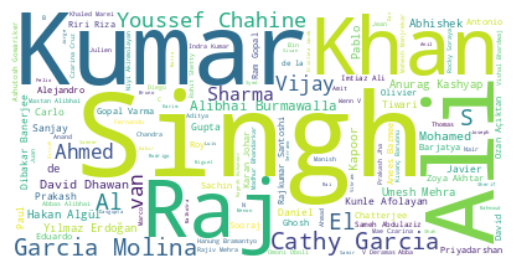


cluster 3


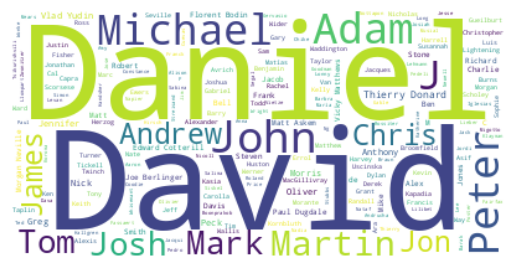


cluster 4


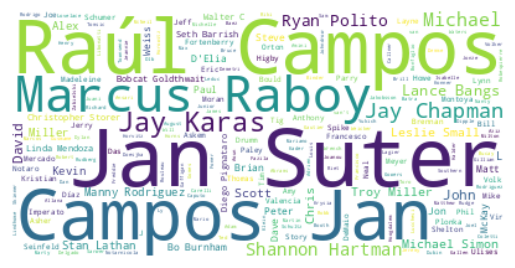

In [ ]:
lists = ['title','listed_in','cast','country','director']
for lst in lists:
  print(f"Word cloud on {lst} for different clusters")
  for i in range(5):
    print(f'cluster {i}')
    wordcloud(i,lst)
    print()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# Hyperparameter tuning is not required

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Text(0, 0.5, 'Distance')

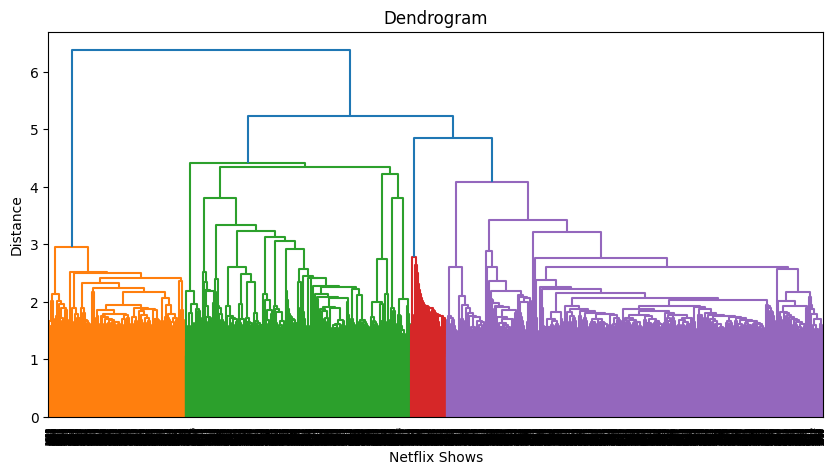

In [ ]:
# Visualizing evaluation Metric Score chart
# Building a dendogram to decide the number of clusters
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,5))
dend = shc.dendrogram(shc.linkage(X,method="ward"))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')

In [ ]:
#Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(X)

array([0, 0, 2, ..., 2, 0, 1])

In [ ]:
# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
# sample view
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'hierarchical_cluster']]

type                                   title               director  \
2205  Movie                                Flimflam           Khaled Marei   
2561  Movie                               Guzaarish  Sanjay Leela Bhansali   
4486  Movie                           No Estoy Loca          Nicolás López   
3874  Movie                   Maine Pyaar Kyun Kiya           David Dhawan   
918   Movie  Bill Burr: You People Are All the Same              Jay Karas   

                                                   cast        country rating  \
2205  Ahmed Helmy, Donia Samir Ghanim, Sabrine, Bayy...          Egypt  TV-14   
2561  Hrithik Roshan, Aishwarya Rai Bachchan, Sherna...          India  TV-14   
4486  Paz Bascuñán, Marcial Tagle, Antonia Zegers, C...          Chile  TV-MA   
3874  Salman Khan, Sushmita Sen, Sohail Khan, Katrin...          India  TV-14   
918                                           Bill Burr  United States  TV-MA   

                                             listed_in  \
2205                    Comedies, International Movies   
2561                      Dramas, International Movies   
4486            Comedies, Dramas, International Movies   
3874  Comedies, International Movies, Music & Musicals   
918                                    Stand-Up Comedy   

                                            description  hierarchical_cluster  
2205  Nosy family in tow, a fun-loving bachelor goes...                     4  
2561  After an onstage disaster leaves an illusionis...                     1  
4486  A woman enters a quirky mental health clinic a...                     0  
3874  After lying to his girlfriend, orthopedic surg...                     1  
918   Funnyman Bill Burr takes the stage to uncork a...                     3

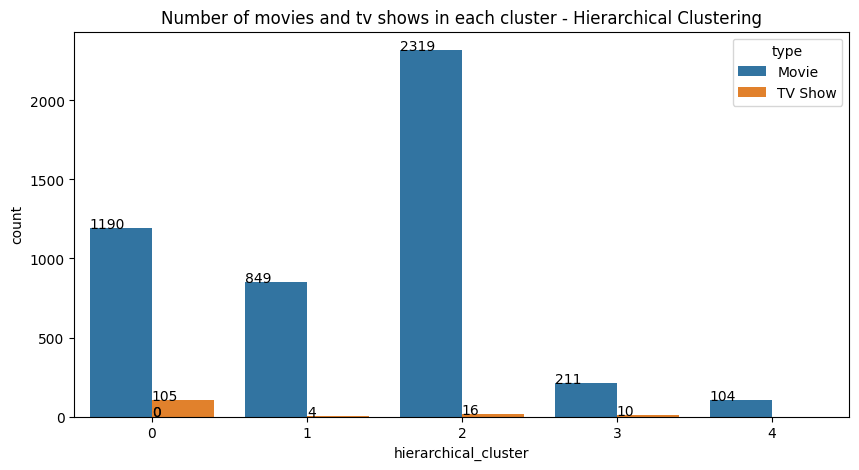

In [ ]:

# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

In [ ]:
from wordcloud import WordCloud, STOPWORDS
def wordcloud2(cluster,column):
  word_df2 = df[['hierarchical_cluster',column]].dropna()
  word_df2 = word_df2[word_df2['hierarchical_cluster']==cluster]

  text = " ".join(word for word in word_df2[column])

  cloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  plt.imshow(cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

Word cloud on title for different clusters
cluster 0


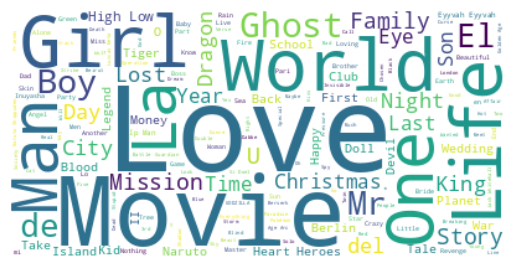


cluster 1


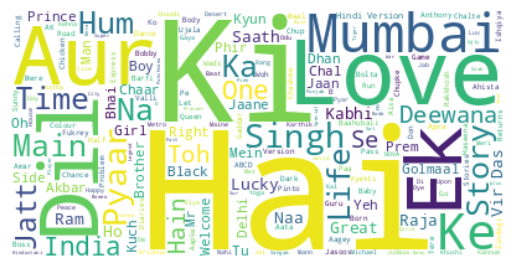


cluster 2


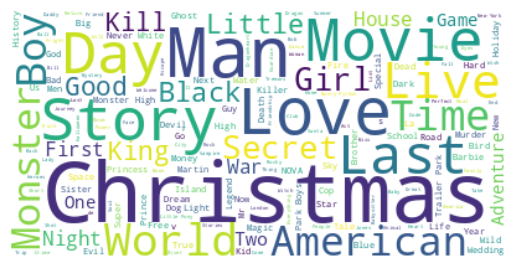


cluster 3


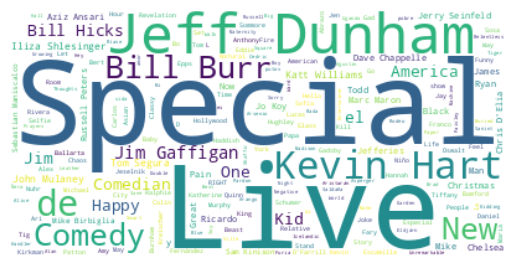


cluster 4


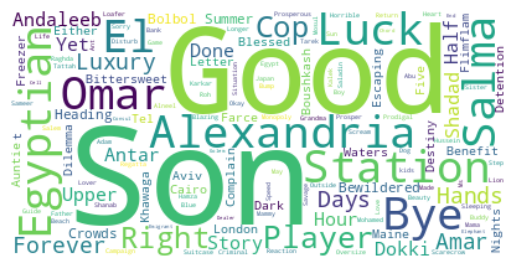


Word cloud on listed_in for different clusters
cluster 0


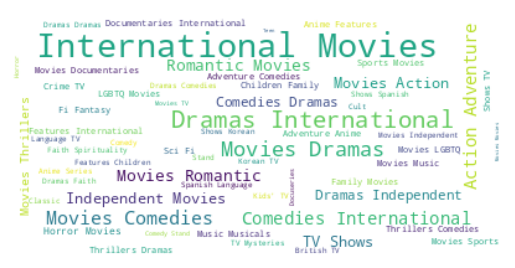


cluster 1


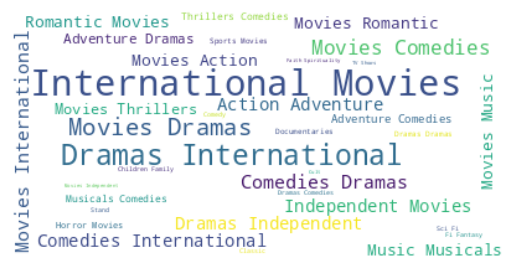


cluster 2


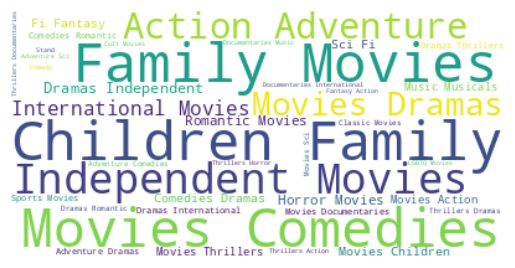


cluster 3


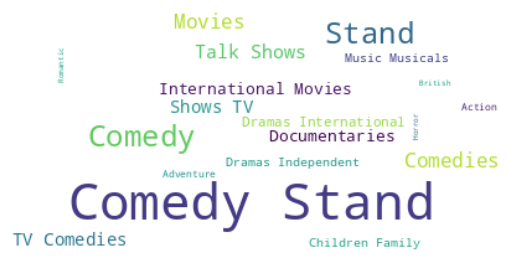


cluster 4


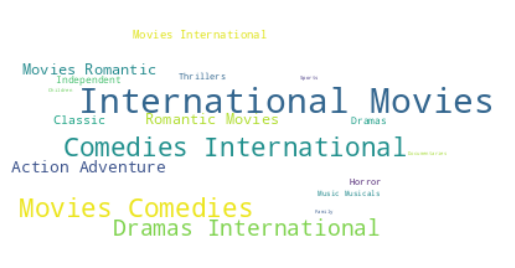


Word cloud on cast for different clusters
cluster 0


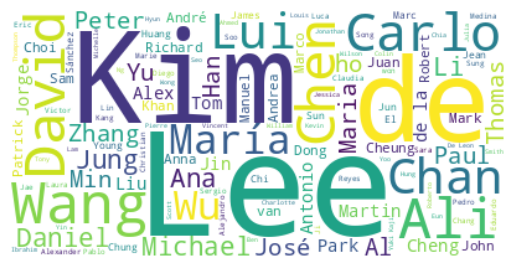


cluster 1


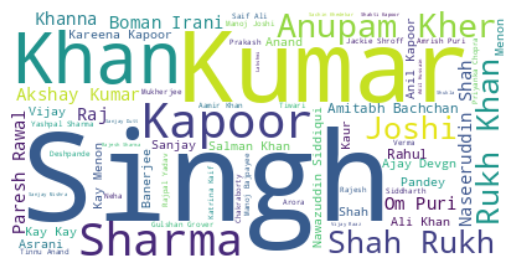


cluster 2


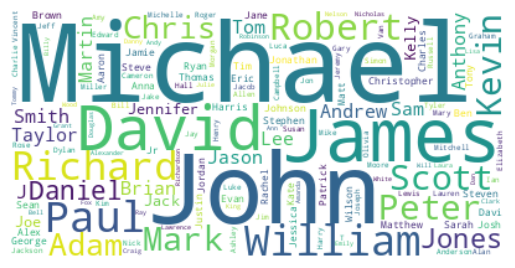


cluster 3


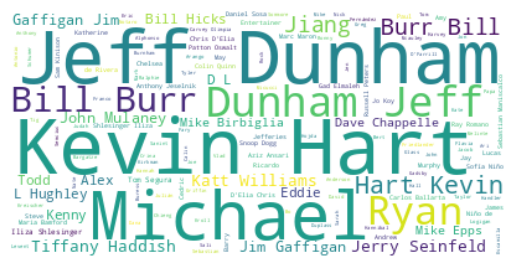


cluster 4


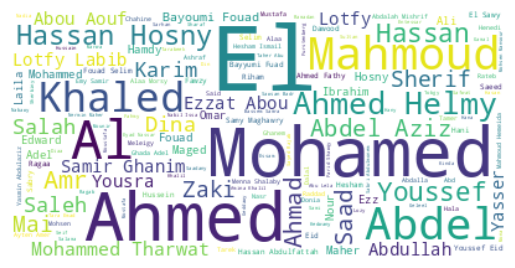


Word cloud on country for different clusters
cluster 0


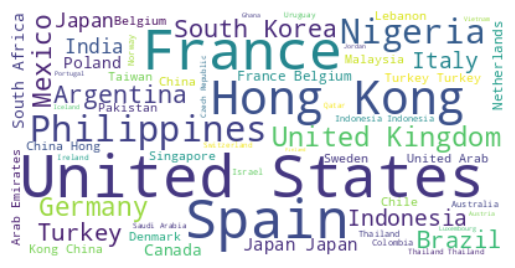


cluster 1


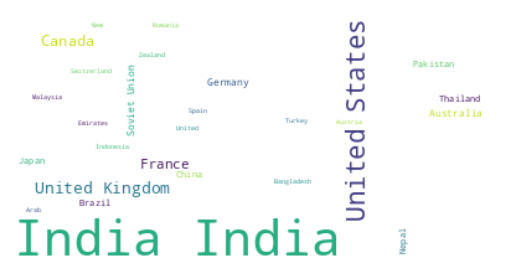


cluster 2


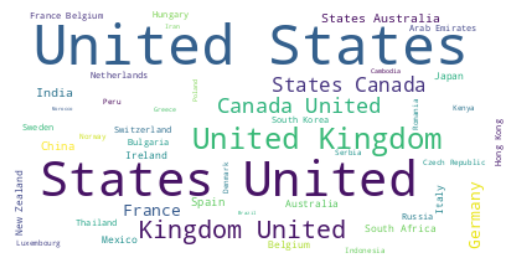


cluster 3


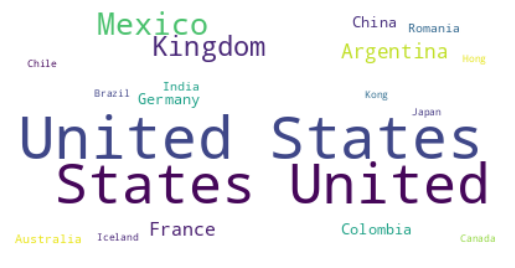


cluster 4


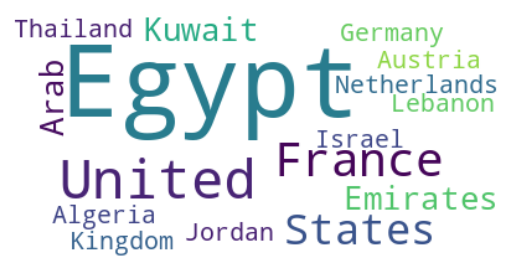


Word cloud on director for different clusters
cluster 0


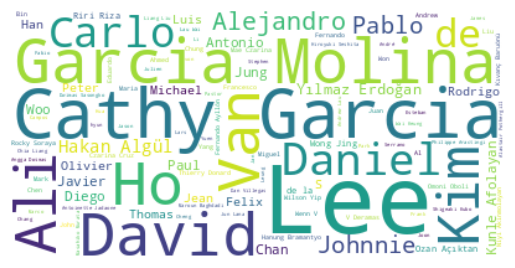


cluster 1


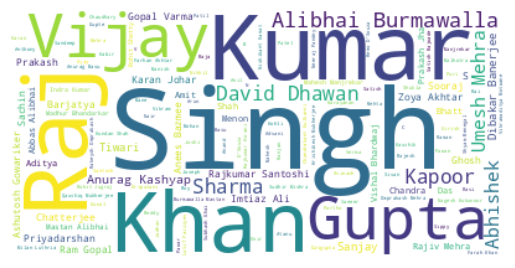


cluster 2


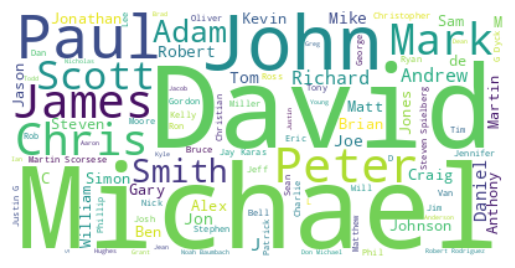


cluster 3


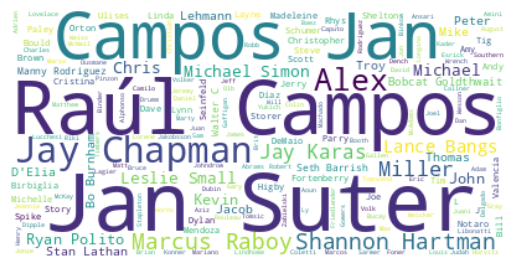


cluster 4


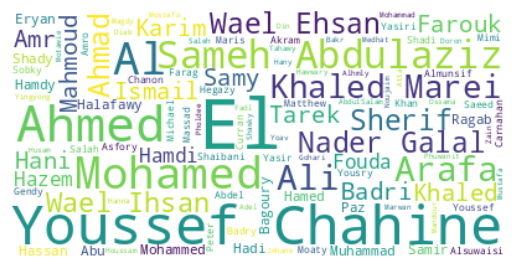

In [ ]:
lists = ['title','listed_in','cast','country','director']
for lst in lists:
  print(f"Word cloud on {lst} for different clusters")
  for i in range(5):
    print(f'cluster {i}')
    wordcloud2(i,lst)
    print()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# Hyperparameter tuning is not required

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# creating dataframe for recommendation system
recommend = df.copy()
recommend.reset_index(inplace=True)
# dropping show-id and index column
recommend.drop(columns=['index', 'show_id'], inplace=True)

In [ ]:
# calling out transformed array independent features created from text_data(cluster) column after performing PCA for dimenssionality reduction.
X

array([[ 0.02483606,  0.02773843, -0.02728826, ..., -0.00487595,
         0.00036159, -0.00810376],
       [-0.00344374, -0.05163792, -0.04860189, ...,  0.00437801,
         0.00069951,  0.01126443],
       [-0.09777628, -0.0958006 , -0.03858354, ..., -0.00576781,
         0.00022685,  0.00036211],
       ...,
       [-0.08952963, -0.02367769, -0.00128398, ..., -0.00031348,
         0.00500928,  0.00763189],
       [ 0.00187744, -0.01132429, -0.00131468, ...,  0.00411052,
         0.00395445, -0.00328611],
       [ 0.13041788,  0.01008299,  0.11597573, ..., -0.00163487,
         0.00260985,  0.0130101 ]])

In [ ]:
# calculate cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.        , -0.00352142, -0.01290544, ..., -0.00282425,
         0.03365082, -0.00455347],
       [-0.00352142,  1.        , -0.01290733, ..., -0.01145153,
        -0.00537459, -0.01011452],
       [-0.01290544, -0.01290733,  1.        , ..., -0.01271067,
        -0.01392858,  0.02113741],
       ...,
       [-0.00282425, -0.01145153, -0.01271067, ...,  1.        ,
        -0.00549383, -0.00943972],
       [ 0.03365082, -0.00537459, -0.01392858, ..., -0.00549383,
         1.        ,  0.00111516],
       [-0.00455347, -0.01011452,  0.02113741, ..., -0.00943972,
         0.00111516,  1.        ]])

In [ ]:
def recommender(movie):
    '''
    This function list down top ten movies on the basis of similarity score for that particular movie.
    '''
    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = recommend[recommend['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])

    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(df.iloc[i[0]].title)

In [ ]:
# Load the File and predict unseen data.
recommender('Moonlight')

If you liked 'Moonlight', you may also enjoy: 

Roxanne Roxanne
Head On
The Place Beyond the Pines
All Day and a Night
Postcards from London
Ninja Assassin
Divines
Princess Cyd
Voyeur
Layer Cake


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***